In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
death = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv")
death.head(15)

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5
5,WEST END,5.0,76.7,9.0,78.0,14.0,77.5
6,ESPLEN,3.0,NaN,13.0,72.5,16.0,71.7
7,ARLINGTON HEIGHTS,10.0,55.0,7.0,72.5,17.0,63.7
8,STRIP DISTRICT,7.0,76.7,12.0,70.0,19.0,72.5
9,FAIRYWOOD,11.0,62.5,9.0,42.5,21.0,53.3


In [25]:
quantity_bool = []
death_total = death["TOTALdeaths*"]
for length in death_total:
    if length > 24:
        quantity_bool.append(True)
    else:
        quantity_bool.append(False)
is_over_tf = pd.Series(quantity_bool)
big_death = death[is_over_tf]
big_death.head()

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
11,MOUNT OLIVER NEIGHBORHOOD,9.0,67.5,17.0,80.0,26.0,75.0
12,EAST CARNEGIE,9.0,72.5,18.0,81.0,27.0,80.0
13,REGENT SQUARE,1.0,NaN,27.0,75.8,28.0,76.7
14,CALIFORNIA-KIRKBRIDE,16.0,70.0,10.0,70.0,30.0,69.3
15,CHARTIERS CITY,20.0,70.0,15.0,81.2,35.0,76.9


In [32]:
big_death = big_death.sort_values("TOTAL MD AGE AT DEATH", ascending = True)
big_death.head()


,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
49,EAST ALLEGHENY,51.0,62.7,100.0,70.0,157.0,66.2
42,ALLENTOWN,41.0,55.6,82.0,72.1,126.0,66.5
38,MANCHESTER,97.0,67.2,15.0,70.0,113.0,67.4
22,NORTHVIEW HEIGHTS,51.0,69.5,1.0,NaN,54.0,68.0
14,CALIFORNIA-KIRKBRIDE,16.0,70.0,10.0,70.0,30.0,69.3


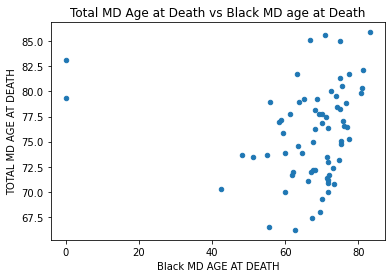

In [40]:
big_death.plot.scatter(x = "Black MD AGE AT DEATH", y = "TOTAL MD AGE AT DEATH", title = "Total MD Age at Death vs Black MD age at Death")

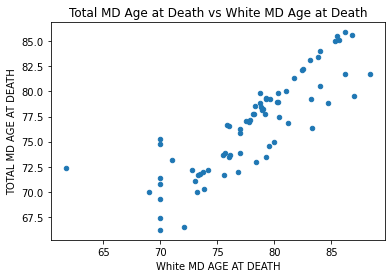

In [41]:
big_death.plot.scatter(x="White MD AGE AT DEATH", y = "TOTAL MD AGE AT DEATH", title = "Total MD Age at Death vs White MD Age at Death")

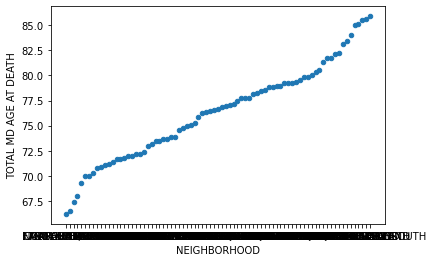

In [42]:
big_death.plot.scatter(x="NEIGHBORHOOD", y="TOTAL MD AGE AT DEATH")

#### Conclusion
I used the dataset "Allegheny County Median Age at Death" to determine the neighborhoods with the lowest median age of death. This is a part of our calculation for the neighborhood that is the best at being the worst/dangerous and I chose this dataset because lower ages of death means there is likely an outside factor causing people to have a shorter lifespan. The number one neighborhood in this dataset is *East Allegheny* coming in with a whopping 66.2 years as the total median age at death. In my calculations, I removed any datasets that had less than 25 total deaths counted because they could skew the data and cause a neighborhood to win this section just because they have very few recorded deaths and 25 seemed to be the number where the median became accurate. The runner ups: *Allentown* came in second and *Manchester* came in third for the lowest median age at death. I included the two graphs at the end because I think that the difference between the two give some interesting insights about the age of death by race. I won't get too much into that because that's not what this is about, but I thought it was worth mentioning that the scaling is different between white and black median deaths and that it seems that black people tend to have a lower median age at death compared to the total for each neighborhood. 